# DATASET PREPROCESSING

In [ ]:
# !gdown --id 0Bx1Nsg-bc9ovNGRlVGJteGhGZ3c
!gdown --id 1gq7Fq-bVHW8k0V_N08QShWTH9W9AC_7B

Downloading...
From: https://drive.google.com/uc?id=1gq7Fq-bVHW8k0V_N08QShWTH9W9AC_7B
To: /content/CICIDS2017_sample.csv
100% 19.9M/19.9M [00:00<00:00, 63.2MB/s]


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from imblearn.over_sampling import ADASYN 

In [ ]:
df = pd.read_csv('./CICIDS2017_sample.csv')

In [ ]:
df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.658000e+04,56580.000000,56580.000000,5.658000e+04,5.658000e+04,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,56580.000000,56580.0,56580.000000,56580.0,56580.000000,56580.000000,5.658000e+04,5.658000e+04,56580.000000,56580.000000,56580.000000,56580.000000,5.658000e+04,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.000000,56580.0,56580.0,56580.0,56580.0,56580.0,56580.0,56580.000000,5.658000e+04,56580.000000,5.658000e+04,56580.000000,56580.000000,56580.000000,56580.000000,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04,5.658000e+04
mean,1.943518e+07,5.899346,5.448533,7.335495e+02,5.289977e+03,166.603393,10.118540,43.213831,57.414468,1554.830134,21.494910,508.463045,644.854237,9.277010e+05,7.784788e+04,1.845205e+06,4.863215e+06,1.603282e+07,1.822564e+05,1.914268e+07,3.514447e+06,6.340282e+06,1.592662e+07,6.538754e+05,8.682916e+06,1.595563e+06,2.162991e+06,5.720259e+06,5.393139e+05,0.038530,0.0,0.000018,0.0,160.228420,145.955567,6.959740e+04,8.250477e+03,8.722322,1607.301997,256.386444,505.203292,1.036491e+06,0.059014,0.038530,0.000141,0.400141,0.364669,0.073224,0.000018,0.000141,0.633510,282.819684,43.213831,508.463045,160.228420,0.0,0.0,0.0,0.0,0.0,0.0,5.899346,7.335495e+02,5.448533,5.289372e+03,8047.932131,2003.000336,3.120237,26.952633,8.139353e+04,2.736039e+04,1.209187e+05,6.493503e+04,1.476543e+07,8.700597e+05,1.542144e+07,1.412669e+07
std,3.674270e+07,56.939175,66.560471,2.136734e+04,1.093474e+05,669.516266,47.889018,174.204630,224.898191,2775.271519,53.472078,848.403748,1219.682770,2.110127e+07,2.702542e+05,4.805157e+06,9.928740e+06,3.289800e+07,3.313042e+06,3.673218e+07,8.946897e+06,1.352426e+07,3.295312e+07,6.901865e+06,2.659211e+07,7.367544e+06,8.436279e+06,2.069353e+07,6.128549e+06,0.192472,0.0,0.004204,0.0,1218.200185,1357.412561,2.636960e+05,3.978154e+04,19.763447,2819.655139,407.863706,883.941012,2.402070e+06,0.235653,0.192472,0.011890,0.489931,0.481342,0.260506,0.004204,0.011890,0.626346,447.600416,174.204630,848.403748,1218.200185,0.0,0.0,0.0,0.0,0.0,0.0,56.939175,2.136734e+04,66.560471,1.092285e+05,13385.862148,7775.325260,53.274003,6.798056,7.401506e+05,3.342942e+05,9.394422e+05,6.840410e+05,3.215987e+07,6.316148e+06,3.303321e+07,3.192938e+07
min,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56580 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56580 non-null  int64  
 1   Total Fwd Packets            56580 non-null  int64  
 2   Total Backward Packets       56580 non-null  int64  
 3   Total Length of Fwd Packets  56580 non-null  int64  
 4   Total Length of Bwd Packets  56580 non-null  int64  
 5   Fwd Packet Length Max        56580 non-null  int64  
 6   Fwd Packet Length Min        56580 non-null  int64  
 7   Fwd Packet Length Mean       56580 non-null  float64
 8   Fwd Packet Length Std        56580 non-null  float64
 9   Bwd Packet Length Max        56580 non-null  int64  
 10  Bwd Packet Length Min        56580 non-null  int64  
 11  Bwd Packet Length Mean       56580 non-null  float64
 12  Bwd Packet Length Std        56580 non-null  float64
 13  Flow Bytes/s    

In [ ]:
# x = x.apply(pd.to_numeric, errors='coerce')
# x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
y= df['Label']
x = df.drop('Label', 1)
x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
le = LabelEncoder()
y=le.fit_transform(y)

In [ ]:
print(np.unique(y,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([22719,  1956,  2767, 18984,    36,  7938,  2180]))


In [ ]:
# labelencoder = LabelEncoder()
# df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
# X = df.drop(['Label'],axis=1).values 
# y = df.iloc[:, -1].values.reshape(-1,1)
# y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 42)
# X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,  train_size = 0.8, test_size = 0.2 )

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(X_validate.shape)
# print(y_validate.shape)

(45264, 77)
(11316, 77)
(45264,)
(11316,)


### Class Imbalance

In [ ]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([18274,  1555,  2201, 15095,    28,  6353,  1758]))

In [ ]:
sm = ADASYN()
X_train_r, y_train_r = sm.fit_resample(X_train, y_train)
print(X_train_r.shape)
print(y_train_r.shape)

(127823, 77)
(127823,)


In [ ]:
np.unique(y_train_r, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([18274, 18222, 18261, 18251, 18271, 18260, 18284]))

# Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier


import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
rnd_clf = RandomForestClassifier(n_estimators=100)
lgm_clf= LGBMClassifier()

voting_clf = VotingClassifier(
    estimators=[('xg',xgb_cl), ('rnf', rnd_clf), ('abd', lgm_clf)],
    voting='soft',weights=[1,1,2])

In [ ]:
rnd_clf.fit(X_train_r, y_train_r)
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9917815482502651


In [ ]:
from sklearn.metrics import accuracy_score

for clf in (xgb_cl, rnd_clf, lgm_clf, voting_clf):
    clf.fit(X_train_r, y_train_r)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    print('--------------------')

XGBClassifier 0.9799586426299046
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4445
           1       0.83      1.00      0.91       401
           2       0.99      1.00      0.99       566
           3       0.99      0.99      0.99      3889
           4       0.64      0.88      0.74         8
           5       0.99      1.00      1.00      1585
           6       0.75      0.99      0.86       422

    accuracy                           0.97     11316
   macro avg       0.88      0.97      0.92     11316
weighted avg       0.98      0.97      0.97     11316

--------------------
RandomForestClassifier 0.9915164369034994
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4445
           1       0.88      1.00      0.93       401
           2       0.99      1.00      1.00       566
           3       1.00      1.00      1.00      3889
           4       1.00      0.75   

Accuracy 0.992079179922234
f1_score 0.992079179922234
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4543
           1       0.87      1.00      0.93       387
           2       1.00      1.00      1.00       543
           3       1.00      1.00      1.00      3787
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1607
           6       0.99      1.00      0.99       442

    accuracy                           0.99     11316
   macro avg       0.98      0.96      0.96     11316
weighted avg       0.99      0.99      0.99     11316



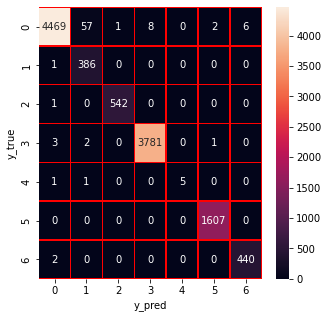

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
y_pred = voting_clf.predict(X_test)
import sklearn.preprocessing
print('Accuracy',accuracy_score(y_test, y_pred))
print('f1_score',f1_score(y_test,y_pred,average='micro'))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


**Feature Select**

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_r, y_train_r)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()

array([False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False])

In [ ]:
selected_feat= X_train_r.columns[(sel.get_support())]
len(selected_feat)

29

In [ ]:
print(selected_feat)

Index(['Total Fwd Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Packets/s',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'URG Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward'],
      dtype='object')


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'xgb_cl__criterion': ['gini', 'entropy'],
      'svm__C': [2,3,4],}
xgb_cl

In [ ]:
X_train_r_fr=X_train_r[selected_feat]
X_test_fr=X_test[selected_feat]

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (xgb_cl, rnd_clf, lgm_clf, voting_clf):
    clf.fit(X_train_r_fr, y_train_r)
    y_pred = clf.predict(X_test_fr)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    print('--------------------')

XGBClassifier 0.9697773064687168
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4543
           1       0.79      1.00      0.88       387
           2       1.00      1.00      1.00       543
           3       0.99      0.99      0.99      3787
           4       0.62      0.71      0.67         7
           5       0.99      1.00      0.99      1607
           6       0.75      1.00      0.85       442

    accuracy                           0.97     11316
   macro avg       0.88      0.95      0.91     11316
weighted avg       0.98      0.97      0.97     11316

--------------------
RandomForestClassifier 0.9944326617179216
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4543
           1       0.95      0.99      0.97       387
           2       1.00      1.00      1.00       543
           3       1.00      1.00      1.00      3787
           4       1.00      0.71   

In [ ]:
!pip install beautifultable
from beautifultable import BeautifulTable
table = BeautifulTable(maxwidth=130)

table.rows.append(["HongPo Zhnag", "CICIDS2017", "SGM", "multiclass","RF\nMLP\nCNN", "93.08\n99.60\n99.85"," " ," ", "94.67\n99.69\n99.86"])
table.rows.append(["Arif Yulianto et al(2019)", "CICIDS2017", "SMOTE" ,"binary","AdaBoost", "81.83"," " ," ", "90.01"])
table.rows.append(["Razab abdulhammed et al(2019)", "CICIDS2017", "UDBB", "multiclass","RF\nNB\nLDA\nQDA", "98.8\n97.6\n95.7\n98.9"," " ," ", "98.8\n97.7\n95.7\n99.0"])
table.rows.append(["Aameer Hanif et al(2017)", "Customer\nChurn", "UnderSampling\nOverSampling SMOTE" ,"binary","RF", ""," " ,"98.5", "97"])
table.rows.append(["Cengiz Colak et al(2017)", "Atrial fibrillation", "SMOTE" ,"binary","GLMBoost\nLogitBoost", "82.47\n96.65"," " ,"82.5\n96.96", ""])
table.rows.append(["Our work", "CICIDS2017", "ADASYN", "mutliclass","RF\nXgBoost\nVotingClassifier", "82.47\n96.65"," " ,"82.5\n96.96", ""])
table.columns.header = ["Works", "Dataset", "method", "Classes", "Classifier","Acc(%)","Kappa(%)","AUC(%)","F1(%)"]
table.columns.alignment = BeautifulTable.ALIGN_RIGHT
table.set_style(BeautifulTable.STYLE_BOX_ROUNDED)
print(table)


╭───────────────────────────┬─────────────────┬────────────────┬────────────┬───────────────┬────────┬──────────┬────────┬───────╮
│                     Works │         Dataset │         method │    Classes │    Classifier │ Acc(%) │ Kappa(%) │ AUC(%) │ F1(%) │
├───────────────────────────┼─────────────────┼────────────────┼────────────┼───────────────┼────────┼──────────┼────────┼───────┤
│              HongPo Zhnag │      CICIDS2017 │            SGM │ multiclass │            RF │  93.08 │          │        │ 94.67 │
│                           │                 │                │            │           MLP │   99.6 │          │        │ 99.69 │
│                           │                 │                │            │           CNN │  99.85 │          │        │ 99.86 │
├───────────────────────────┼─────────────────┼────────────────┼────────────┼───────────────┼────────┼──────────┼────────┼───────┤
│ Arif Yulianto et al(2019) │      CICIDS2017 │          SMOTE │     binary │      